In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
%matplotlib inline

In [3]:
df = pd.read_csv('urban_background_merged_data.csv')
df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
0,40.546977,46.820455,78.222093,41.763953,68.173171,40.818605,50.206279,57.501667,45.684419,61.354048,45.842791,39.434545,43.548837
1,35.402195,35.191951,74.776190,39.672195,61.520250,33.403864,40.587209,45.246279,40.899773,56.093750,35.498140,32.508605,40.053953
2,34.210465,31.319091,67.130714,42.015610,61.962326,29.184634,34.446591,41.216585,40.546512,52.009722,30.473256,30.993514,38.244390
3,31.672439,32.155814,71.137000,51.462326,72.762326,28.668571,32.278409,43.518537,42.905349,48.253333,31.302558,32.384324,33.863409
4,31.380976,35.178372,86.985000,51.929024,70.987907,30.668864,30.506364,44.241905,42.643256,48.503750,39.681395,32.768182,33.655581


In [5]:
df.isnull().sum(axis = 0)

nakasero_ii(2)    0
kansanga          0
nansana_east      0
lubaga            0
nansana_west      0
lukuli(2)         0
bugolobi          0
kyaliwajjala      0
seguku            0
kiwafu            0
kiwatule          0
civic_centre      0
makindye_i        0
dtype: int64

In [6]:
my_array = df.to_numpy()
my_array

array([[ 40.54697674,  46.82045455,  78.22209302, ...,  45.8427907 ,
         39.43454545,  43.54883721],
       [ 35.40219512,  35.19195122,  74.77619048, ...,  35.49813953,
         32.50860465,  40.05395349],
       [ 34.21046512,  31.31909091,  67.13071429, ...,  30.47325581,
         30.99351351,  38.24439024],
       ...,
       [ 63.83813953,  47.77465116, 166.73461538, ...,  65.84452381,
         74.73621622,  98.15586207],
       [ 75.88744186,  45.2402439 , 178.04604651, ...,  69.0197561 ,
         79.80325581,  71.40296296],
       [107.94418605,  37.52227273, 153.40093023, ...,  52.35928571,
         87.21911111,  59.53037037]])

In [7]:
def generate_cod(n, func_array):
    location = func_array
    location[:, n+1:] = (func_array[:, n+1:]-func_array[:, n][:, None])/(func_array[:, n+1:]+func_array[:, n][:, None])
    location = location[:, n+1:]**2
    COD = pd.DataFrame(np.sqrt(np.mean(location, axis=0)),
                      index= list(df.columns[n+1:]),
                      columns = [df.columns[n]])
    COD.to_csv('cods/urban_background/'+df.columns[n]+'_COD.csv')
    return COD

In [8]:
generate_cod(1, my_array)

c:\users\user\anaconda3\envs\ox\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,nakasero_ii(2)
kansanga,NaN
nansana_east,0.294856
lubaga,NaN
nansana_west,0.418008
lukuli(2),NaN
bugolobi,NaN
kyaliwajjala,NaN
seguku,0.178320
kiwafu,0.304886
kiwatule,NaN


In [6]:
#Start from here tomorrow- has NaNs investigate!!

In [23]:
merged_cod = pd.read_csv('cods/urban_background/merged_COD.csv')
merged_cod.rename({'Unnamed: 0':''}, axis=1, inplace=True)
merged_cod.set_index('', inplace=True)
merged_cod.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000000,0.189951,0.294856,0.196558,0.418008,0.181255,0.183829,0.229937,0.178320,0.304886,0.189997,0.134368,0.194511
kansanga,0.189951,0.000000,0.367006,0.262260,0.468170,0.174502,0.170789,0.292390,0.223202,0.264262,0.192132,0.216755,0.236476
nansana_east,0.294856,0.367006,0.000000,0.226757,0.336342,0.310434,0.333262,0.183534,0.290969,0.449329,0.326481,0.251539,0.233177
lubaga,0.196558,0.262260,0.226757,0.000000,0.372807,0.236676,0.262665,0.191080,0.200635,0.354729,0.243987,0.181186,0.189676
nansana_west,0.418008,0.468170,0.336342,0.372807,0.000000,0.440201,0.454235,0.365943,0.409087,0.522704,0.464260,0.392954,0.383492


In [24]:
rounded_cod =merged_cod.round(decimals=3)
rounded_cod.to_csv('urban_background_coefficient_of_divergence.csv')
rounded_cod

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000,0.190,0.295,0.197,0.418,0.181,0.184,0.230,0.178,0.305,0.190,0.134,0.195
kansanga,0.190,0.000,0.367,0.262,0.468,0.175,0.171,0.292,0.223,0.264,0.192,0.217,0.236
nansana_east,0.295,0.367,0.000,0.227,0.336,0.310,0.333,0.184,0.291,0.449,0.326,0.252,0.233
lubaga,0.197,0.262,0.227,0.000,0.373,0.237,0.263,0.191,0.201,0.355,0.244,0.181,0.190
nansana_west,0.418,0.468,0.336,0.373,0.000,0.440,0.454,0.366,0.409,0.523,0.464,0.393,0.383
lukuli(2),0.181,0.175,0.310,0.237,0.440,0.000,0.154,0.252,0.213,0.305,0.206,0.175,0.164
bugolobi,0.184,0.171,0.333,0.263,0.454,0.154,0.000,0.267,0.225,0.308,0.199,0.189,0.213
kyaliwajjala,0.230,0.292,0.184,0.191,0.366,0.252,0.267,0.000,0.237,0.399,0.246,0.186,0.186
seguku,0.178,0.223,0.291,0.201,0.409,0.213,0.225,0.237,0.000,0.313,0.218,0.179,0.206


In [27]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.savefig('urban_background_COD.png')
    plt.show()

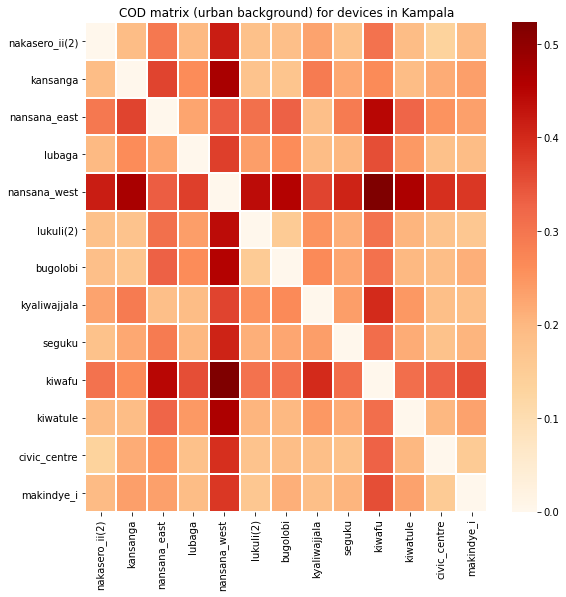

In [28]:
heat_map(rounded_cod, 'COD matrix (urban background) for devices in Kampala')